In [195]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
import sklearn

In [196]:
df = pd.read_csv("amazon_cells_labelled.txt", error_bad_lines=False, header=None, sep="\t")

In [197]:
df.tail(45)

,0,1
955,Buttons are too small.,0
956,Just reading on the specs alone makes you say ...,1
957,Love it.. Great armband.,1
958,I really like this product over the Motorola b...,1
959,"However, the keypads are so tinny that I somet...",0
960,I exchanged the sony ericson z500a for this an...,1
961,I was very impressed with the price of the cases.,1
962,Also makes it easier to hold on to.,1
963,I use this product in a motor control center w...,1
964,It's pretty easy.,1


In [198]:
df.columns = ["message", "negative review"]

In [199]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [200]:
df["negative review"] = (df["negative review"] == 0)

In [201]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,True
1,"Good case, Excellent value.",False
2,Great for the jawbone.,False
3,Tied to charger for conversations lasting more...,True
4,The mic is great.,False


In [241]:
bad_words = ["waste", "awful", "cheap", "problem", "mislead", "lousy", "disappointed", "junk", "unsatisfactory", "not"]
good_words = ["excellent", "great", "best", "amazing", "impressed", "love", "good", "nice", "happy", "beautiful"]

for word in bad_words:
    df[str(word)] = df["message"].str.contains(str(word), case=False)

  

In [242]:
for word in good_words:
    df[str(word)] = df["message"].str.contains(str(word), case=False)

In [243]:
df.columns

Index(['message', 'negative review', 'waste', 'awful', 'cheap', 'problem',
       'mislead', 'lousy', 'disappointed', 'junk', 'unsatisfactory',
       'excellent', 'great', 'best', 'amazing', 'impressed', 'love', 'not',
       'good', 'nice', 'happy', 'beautiful'],
      dtype='object')

In [244]:
df.tail(30)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,...,great,best,amazing,impressed,love,not,good,nice,happy,beautiful
970,I plugged it in only to find out not a darn th...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
971,Excellent product.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
972,Earbud piece breaks easily.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
973,Lousy product.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
974,This phone tries very hard to do everything bu...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
975,It is the best charger I have seen on the mark...,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
976,SWEETEST PHONE!!!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
977,":-)Oh, the charger seems to work fine.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
978,It fits so securely that the ear hook does not...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
979,Not enough volume.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [245]:
df.head(10)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,...,great,best,amazing,impressed,love,not,good,nice,happy,beautiful
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


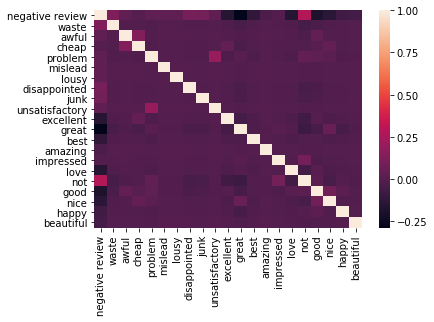

In [246]:
sns.heatmap(df.corr())

In [247]:
data = df.iloc[:, 2:]
target = df["negative review"]

In [248]:
target.head()

0     True
1    False
2    False
3     True
4    False
Name: negative review, dtype: bool

In [249]:
data.shape

(1000, 20)

In [250]:
type(target)

pandas.core.series.Series

In [251]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
model = bnb.fit(data, target)
y_pred = model.predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total of 1000 points: 278


In [229]:
df["negative review"].value_counts()

True     500
False    500
Name: negative review, dtype: int64

In [240]:
df[(df["negative review"] != y_pred)& (df["negative review"] == False)]

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,unsatisfactory,excellent,great,best,amazing,impressed,love,not
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13,Very good quality though,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15,Highly recommend for any one who has a blue to...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17,So Far So Good!.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,I have yet to run this new battery below two b...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31,This product is ideal for people like me whose...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34,Car charger as well as AC charger are included...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36,It has kept up very well.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42,Nice headset priced right.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45,It has all the features I want,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[238, 262],
       [ 16, 484]], dtype=int64)